# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display all output in a cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Make graph output appear and be stored within notebook
%matplotlib inline

In [4]:
df = pd.read_csv('formatted_flights.csv')
df.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

# Negative means early arrival
# Positive means late arrival

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


# Data Visualization

## Histogram

### Visualize across airlines

In [6]:
# Set default styling for seaborn graph
sns.set()

In [7]:
df.arr_delay.max() - df.arr_delay.min()
# Result is 180 minutes. We will use 180 divided by the desired binwidth to get best visualization

180.0

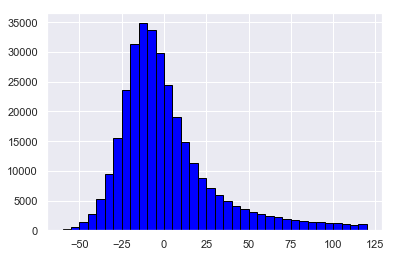

In [8]:
# Plot in matplotlib
plt.hist(df['arr_delay'], color='blue', 
         edgecolor='black', 
         bins=int(180/5)) # range of the data (from -60 to 120 minutes) divided by the binwidth of 5 minutes

plt.show()

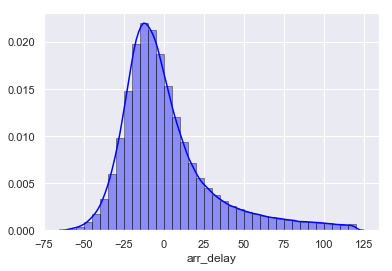

In [9]:
# Plot in seaborn
sns.distplot(df['arr_delay'], 
             hist=True, # Draw histogram
             kde=True, # Add Kernel Density Estimate curve, if not necessary use False
             bins=int(180/5), # range of the data (from -60 to 120 minutes) divided by the binwidth of 5 minutes
             color='blue', hist_kws={'edgecolor': 'black'})

plt.show()

(array([  3790.,  35699., 112912.,  86119.,  35825.,  17159.,  10221.,
          6861.,   4893.,   3634.]),
 array([-60., -42., -24.,  -6.,  12.,  30.,  48.,  66.,  84., 102., 120.]),
 <a list of 10 Patch objects>)

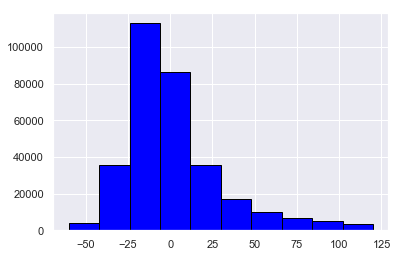

In [10]:
# Matplotlib choose binwidth automatically
plt.hist(df['arr_delay'], color='blue', edgecolor='black')

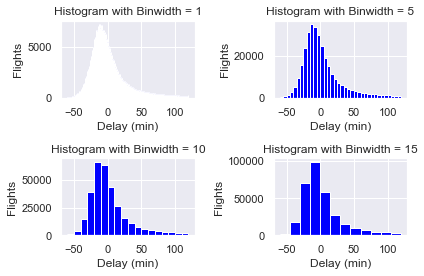

In [11]:
# Visualize in 4 different binwidth
for i, binwidth in enumerate([1, 5, 10, 15]):
    # Setup the plot
    ax = plt.subplot(2, 2, i+1)
    
    # Draw the plot
    ax.hist(df['arr_delay'], color='blue',
            bins= int(180/binwidth))
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth)
    ax.set_xlabel('Delay (min)')
    ax.set_ylabel('Flights')
    
plt.tight_layout()
plt.show()

### Compare airlines

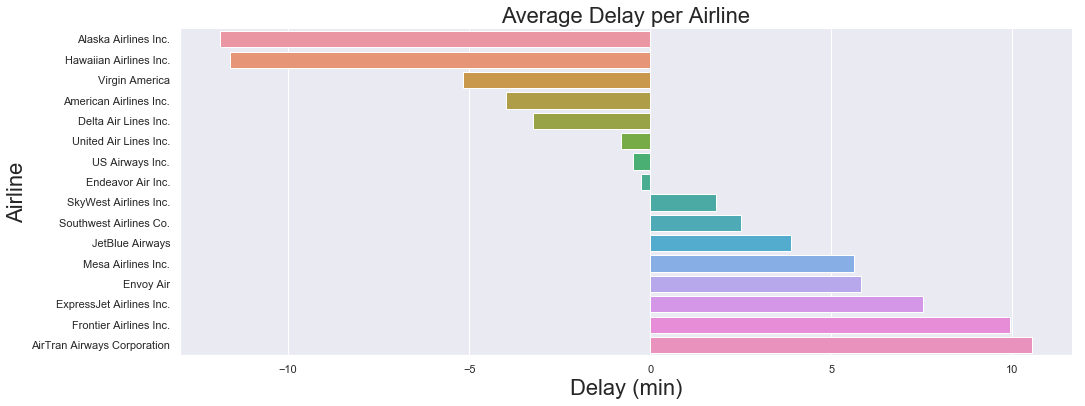

In [12]:
# Graph average delay by airline using seaborn
plt.figure(figsize=(16, 6))

sns.barplot(x='arr_delay', y='name', data=df.groupby(['name']).mean().sort_values(by=['arr_delay']).reset_index())

sns.despine() # remove border
plt.title('Average Delay per Airline', size=22)
plt.xlabel('Delay (min)', size=22)
plt.ylabel('Airline', size=22)
plt.show()

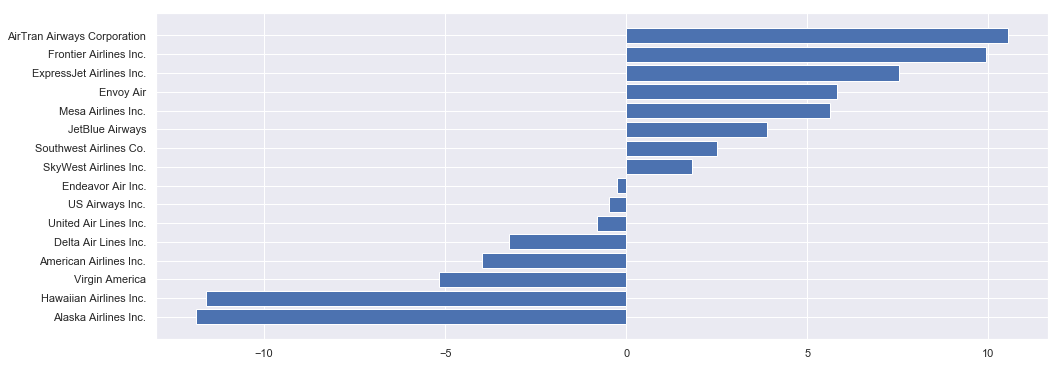

In [13]:
delay = df.groupby(['name']).mean().sort_values(by=['arr_delay']).reset_index()

# Graph average delay by airline using matplotlib
plt.figure(figsize=(16, 6))

plt.barh(np.arange(delay.name.nunique()), delay['arr_delay'])
plt.yticks(np.arange(0,16), delay['name'])

plt.show()

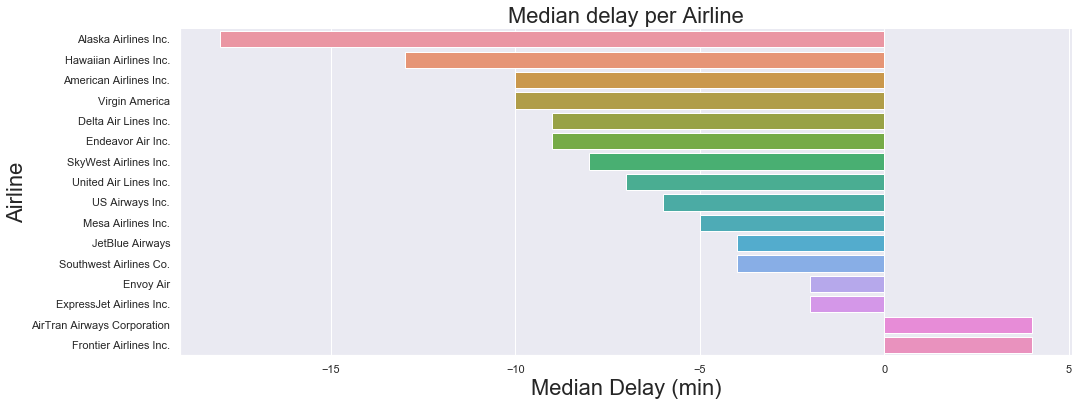

In [14]:
# Graph median delay by airline
plt.figure(figsize=(16, 6))

sns.barplot(x='arr_delay', y='name', 
            data=df.groupby(['name']).median().sort_values(by=['arr_delay']).reset_index())

sns.despine()
plt.title('Median delay per Airline', size=22)
plt.xlabel('Median Delay (min)', size=22)
plt.ylabel('Airline', size=22)
plt.show()

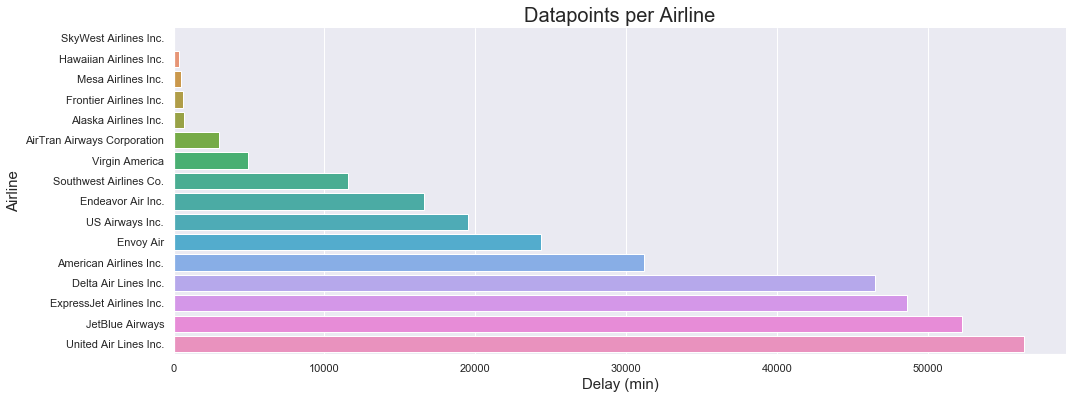

In [15]:
# Create bar graph to visualize datapoint per airline
plt.figure(figsize=(16, 6))

sns.barplot(x='arr_delay', y='name',
           data=df.groupby(['name']).count().sort_values(by=['arr_delay']).reset_index())

sns.despine() # remove border
plt.title('Datapoints per Airline', size=20)
plt.xlabel('Delay (min)', size=15)
plt.ylabel('Airline', size=15)
plt.show()

In [16]:
# New dataframe for airlines with most datapoints
datapoints = df.groupby(['name']).count().reset_index()
datapoints = datapoints[datapoints['arr_delay'] > 20000]
datapoints

,name,arr_delay
2,American Airlines Inc.,31197
3,Delta Air Lines Inc.,46468
5,Envoy Air,24327
6,ExpressJet Airlines Inc.,48641
9,JetBlue Airways,52267
14,United Air Lines Inc.,56359


Text(0, 0.5, 'Density')

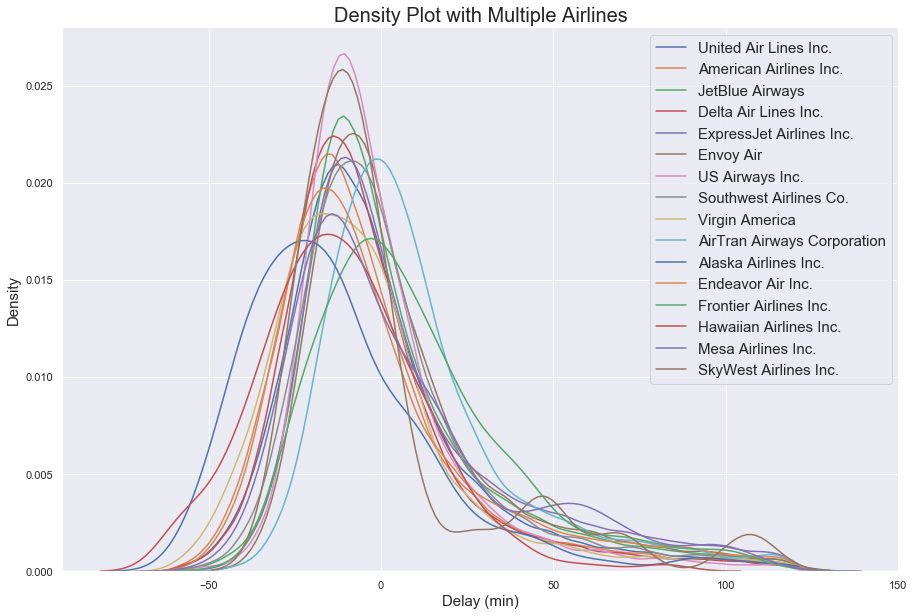

In [17]:
# Draw KDE of multiple airlines using seaborn
ax, fig = plt.subplots(figsize=(15,10))

for airline in df['name'].unique():
    sns.distplot(df[df['name'] == airline]['arr_delay'], 
                 hist=False, 
                 kde=True, 
                 label=airline)

sns.despine()
plt.title('Density Plot with Multiple Airlines', size=20)
plt.legend(fontsize=15)
plt.xlabel('Delay (min)', size=15)
plt.ylabel('Density', size=15)

Text(0, 0.5, 'Density')

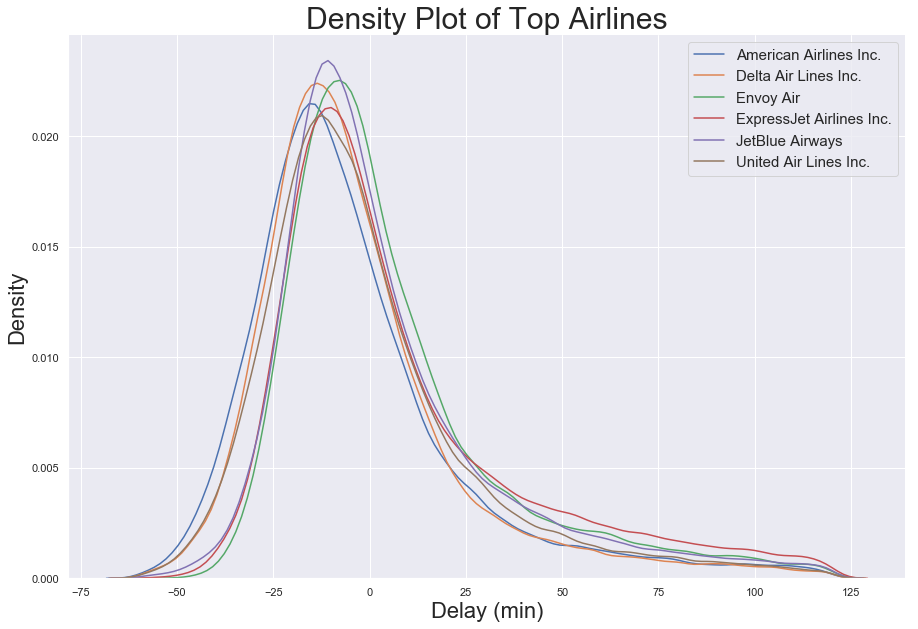

In [18]:
# Draw KDE of top airlines using seaborn
ax, fig = plt.subplots(figsize=(15,10))

for airline in datapoints['name'].unique():
    sns.distplot(df[df['name'] == airline]['arr_delay'], 
                 hist=False, 
                 kde=True, 
                 label=airline)

sns.despine()
plt.title('Density Plot of Top Airlines', size=30)
plt.legend(fontsize=15)
plt.xlabel('Delay (min)', size=22)
plt.ylabel('Density', size=22)

We will choose American Airlines as the best airline for the following reasons:

1. Adequate datapoints
2. Best average delay among top airlines
3. Best median delay among top airlines
3. More likely to be on time per kde
4. Less likely to delay more than average per kde

# Proof for Central Limit Theorem using Flight Delay Dataset

Central Limit Theorem

1. The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn
2. The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)
3. The spread of the sampling distribution is related to the spread of the population values ( sample mean = pop. mean, std. dev. = pop. std. dev. / sqrt(sample size n)
4. Bigger samples lead to a smaller spread in the sampling dist. (self evident from the equation above)

## The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn

In [20]:
# Retrieve population parameter
population = df['arr_delay']
pop_mean = population.mean()
pop_std = population.std()

In [34]:
# Get 1 sample of size 100 and its parameter
sample = df['arr_delay'].sample(n= 100,
                      random_state =44) # For reproducibility
sample_mean = sample.mean()
sample_std = sample.std()

# Get 100 samples' mean and standard deviation of size 100
list_samples_mean = [df['arr_delay'].sample(n= 100).mean() for i in range(100)]
list_samples_std = [df['arr_delay'].sample(n= 100).std() for i in range(100)]

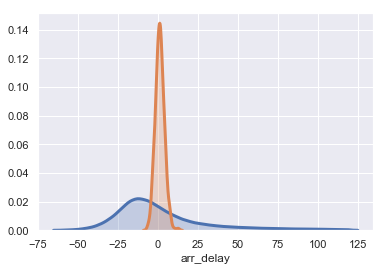

In [35]:
sns.distplot(population, hist=False, kde=True, kde_kws={'shade': True, 'linewidth':3})
sns.distplot(list_samples_mean, hist=False, kde=True, kde_kws={'shade': True, 'linewidth':3})

## The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)

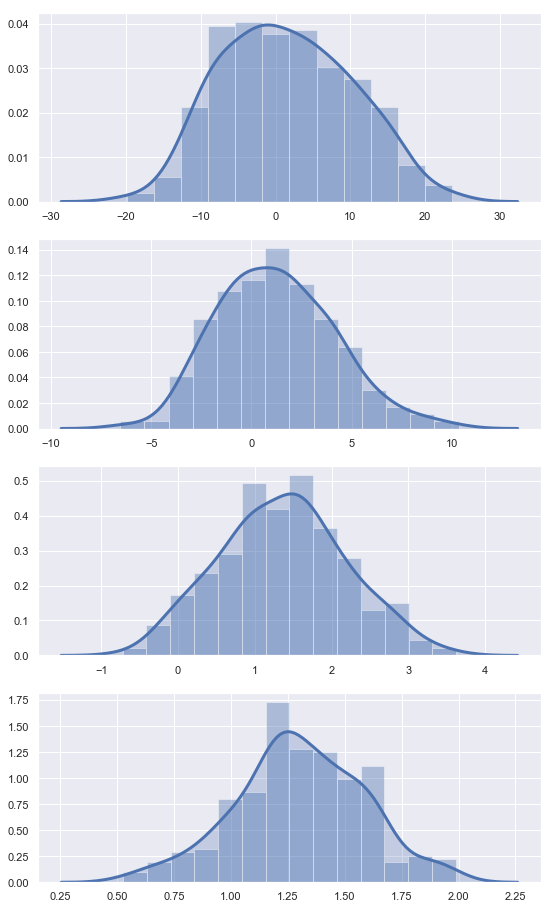

In [48]:
sample_sizes = [10, 100, 1000, 10000]

fig, ax = plt.subplots(len(sample_sizes), figsize=(9,16))

for i, n in enumerate(sample_sizes):
    mu_sample = [np.mean(df['arr_delay'].sample(n)) for j in range(300)]
    sns.distplot(mu_sample, hist=True, kde=True,
                kde_kws={'shade': True, 'linewidth':3},
                ax=ax[i])
    #sns.distplot(population, hist=False, kde=True, 
     #            kde_kws={'shade': True, 'linewidth':3},
      #           ax=ax[i])


## The spread of the sampling distribution is related to the spread of the population values ( sample mean = pop. mean, std. dev. = pop. std. dev. / sqrt(sample size n)

## Bigger samples lead to a smaller spread in the sampling dist. (self evident from the equation above)